# Feauture correlation
Boston house pricing problem

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
feature_names= ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
x = pd.DataFrame(data, columns = feature_names)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
y = pd.Series(target, name='MEDV')
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Data scaling: Standardization

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_train_standardized = pd.DataFrame(X_train_standardized, columns = X_train.columns)

In [7]:
X_train_standardized.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.203052,0.394004,-0.059438,0.437684,-0.196545,0.340676,-0.372582,0.625828,0.578899,0.280752,-0.331379,0.464403
ZN,-0.203052,1.000000,-0.534523,-0.024872,-0.527536,0.348199,-0.585812,0.656658,-0.313497,-0.329665,-0.396806,0.171123,-0.428584
INDUS,0.394004,-0.534523,1.000000,0.019945,0.757107,-0.405883,0.635978,-0.699502,0.573361,0.720073,0.390679,-0.342290,0.606026
CHAS,-0.059438,-0.024872,0.019945,1.000000,0.032281,0.107340,0.048548,-0.071933,-0.010475,-0.048810,-0.107799,0.079502,-0.061047
NOX,0.437684,-0.527536,0.757107,0.032281,1.000000,-0.304220,0.743162,-0.774841,0.635081,0.693064,0.199779,-0.384622,0.596475
RM,-0.196545,0.348199,-0.405883,0.107340,-0.304220,1.000000,-0.261999,0.204028,-0.197837,-0.290858,-0.379197,0.140592,-0.620118
AGE,0.340676,-0.585812,0.635978,0.048548,0.743162,-0.261999,1.000000,-0.754547,0.444137,0.504211,0.244094,-0.253652,0.612759
DIS,-0.372582,0.656658,-0.699502,-0.071933,-0.774841,0.204028,-0.754547,1.000000,-0.479621,-0.536082,-0.203303,0.268693,-0.503193
RAD,0.625828,-0.313497,0.573361,-0.010475,0.635081,-0.197837,0.444137,-0.479621,1.000000,0.904438,0.447445,-0.446020,0.480207
TAX,0.578899,-0.329665,0.720073,-0.048810,0.693064,-0.290858,0.504211,-0.536082,0.904438,1.000000,0.453687,-0.436716,0.543012


<Axes: >

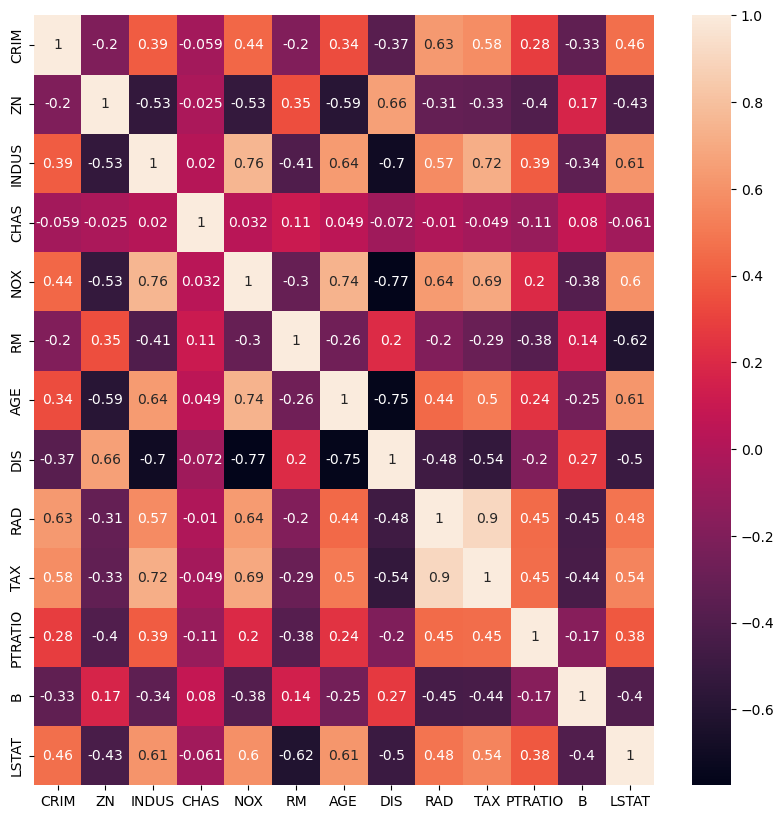

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
#Exploration
plt.figure(figsize = (10, 10))
sns.heatmap(X_train_standardized.corr(), annot = True)

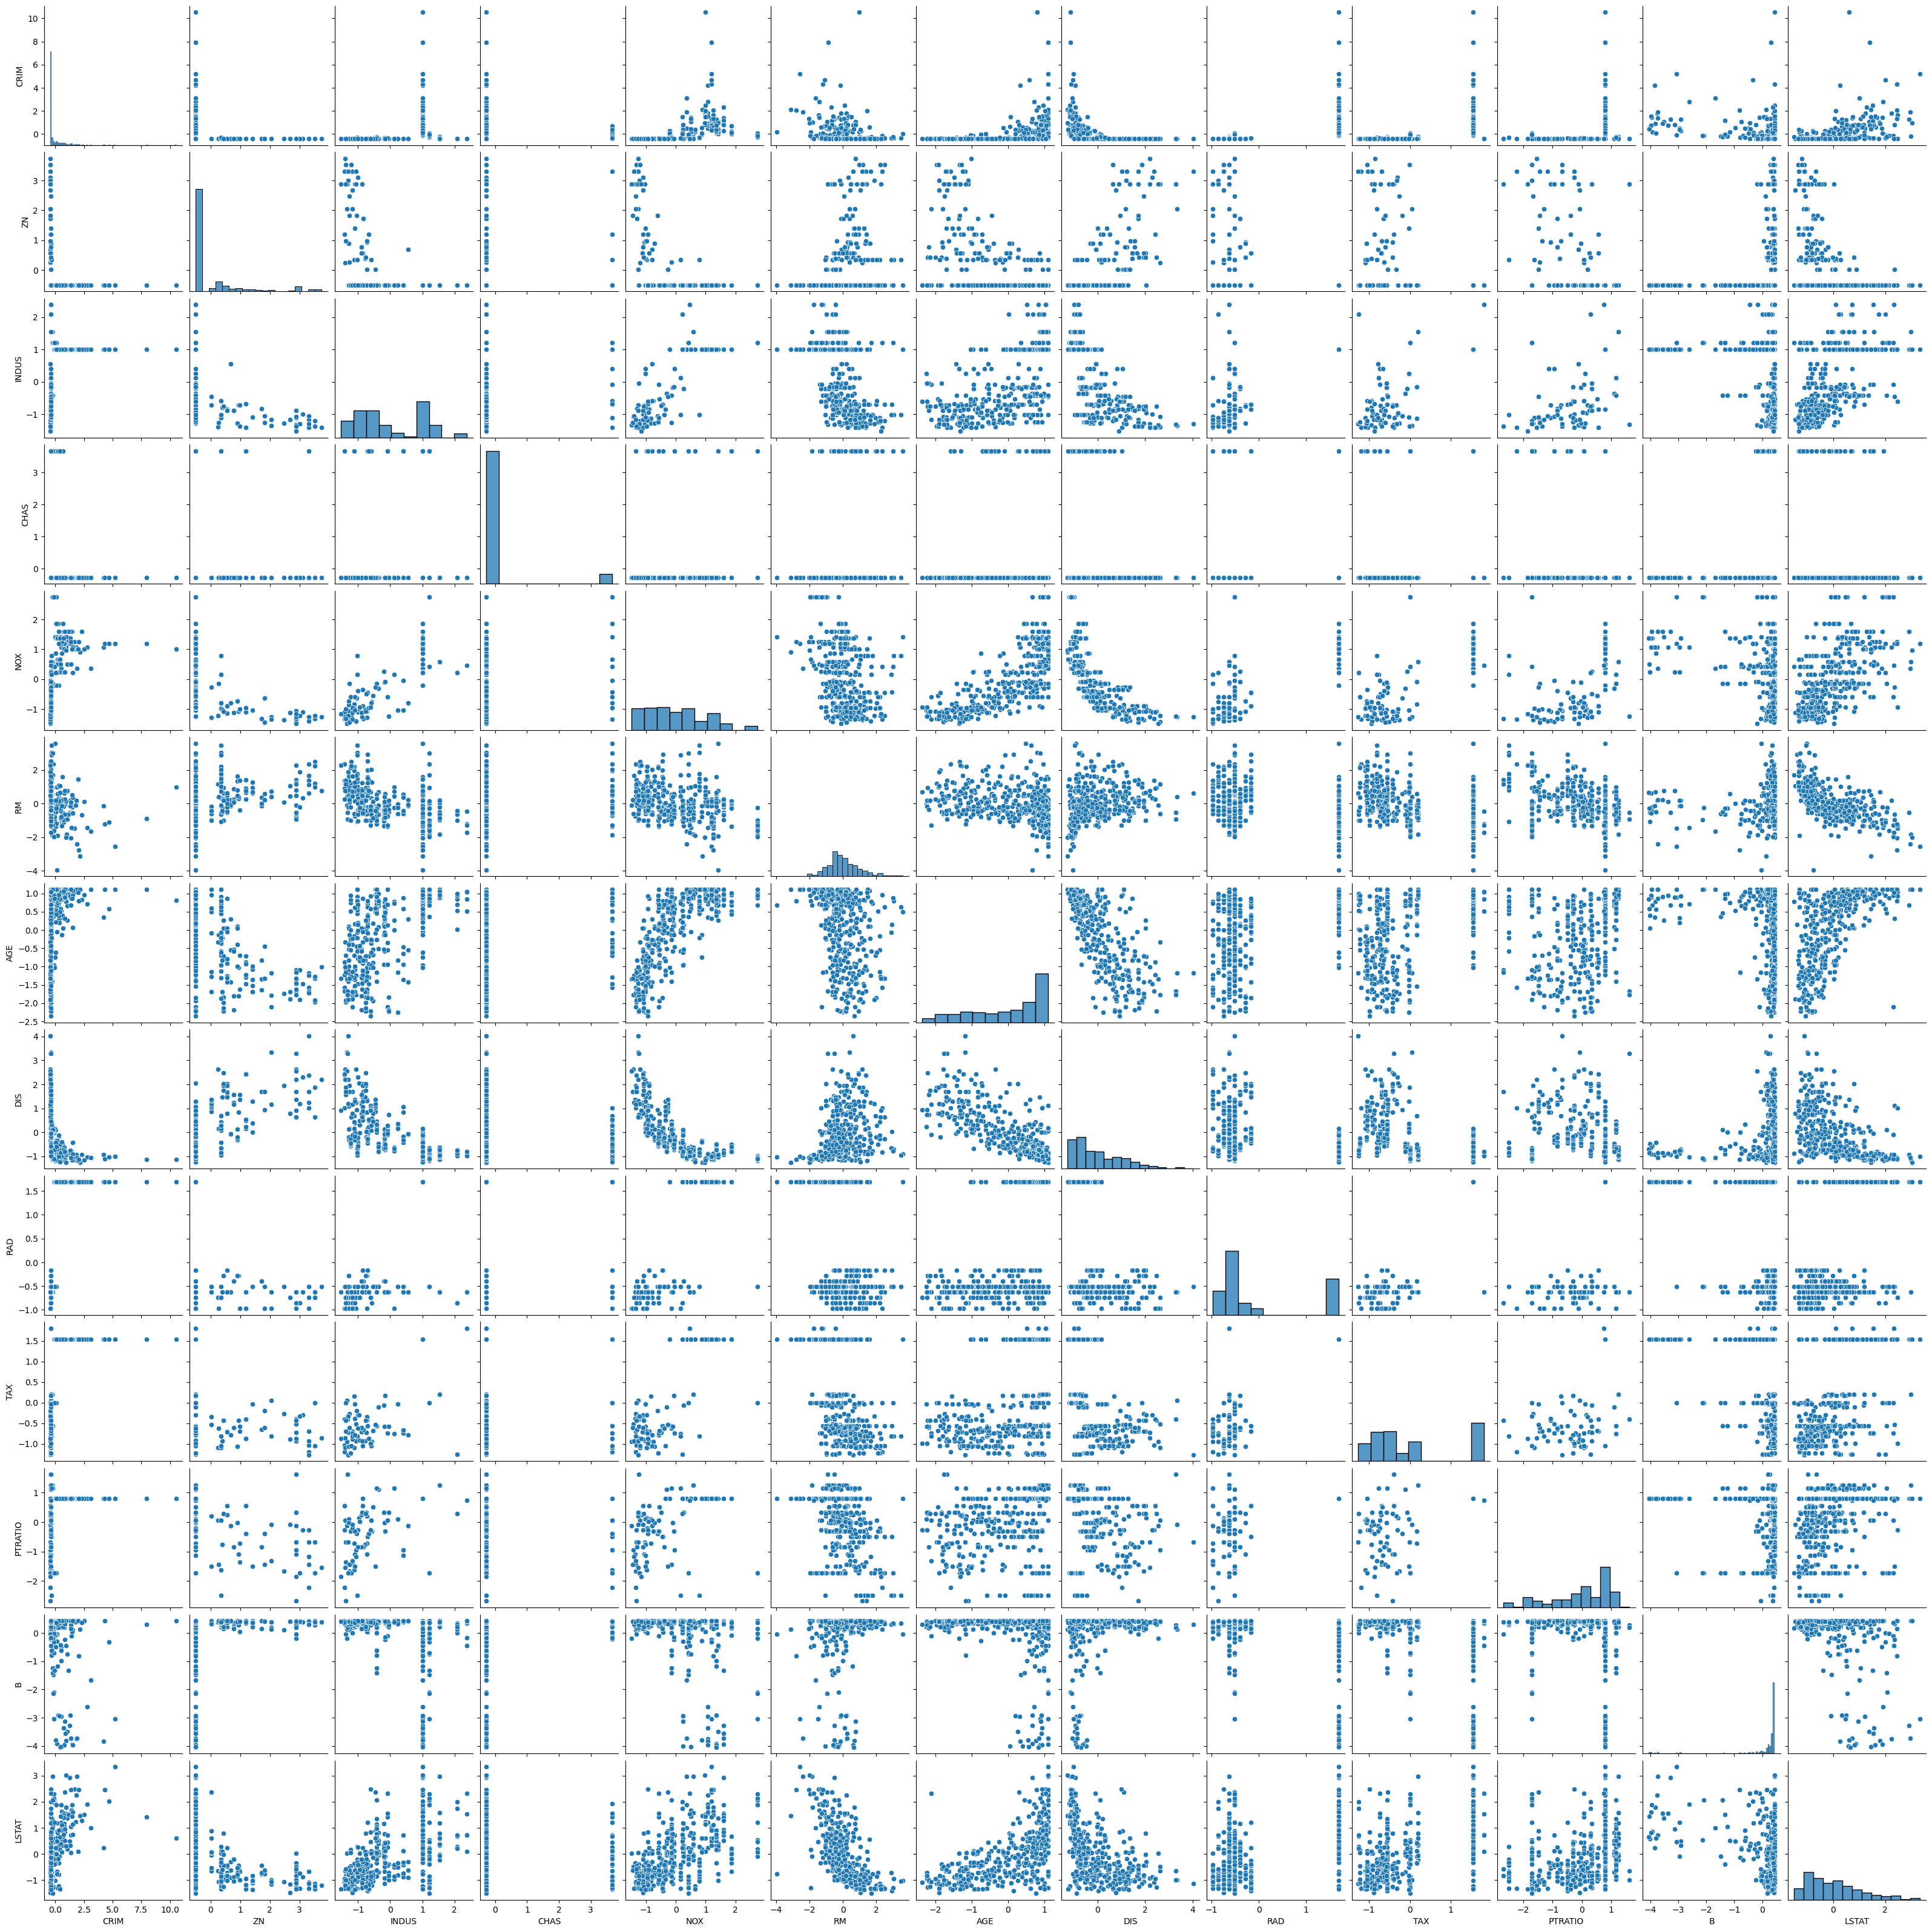

In [9]:
#pairplot
sns.pairplot(X_train_standardized)

## Lasso Regression

This is a regularization technique used in feature selection using a Shrinkage method also referred to as the **penalized regression method**. In this shrinkage technique, the coefficients determined in the linear model below are shrunk towards the central point as the mean by introducing a penalization factor called the alpha α values.

$L(\hat\beta) = \sum^{n}_{i=1} (y_{i}-x_{i}\hat\beta)^2 + \alpha \sum^{m}_{j-1}|{\hat\beta_{j}}|$

* Alpha $(\alpha)$ is the penalty term that denotes the amount of shrinkage (or constraint) that will be implemented in the equation. With alpha set to zero, you will find that this is the equivalent of the linear regression model.

* Alpha $(\alpha)$ can be any real-valued number between zero and infinity; the larger the value, the more aggressive the penalization is.

Due to the fact that coefficients will be shrunk towards a mean of zero, less important features in a dataset are eliminated when penalized. The shrinkage of these coefficients based on the alpha value provided leads to some form of automatic feature selection, as input variables are removed in an effective approach.

Lasso without standardization

In [16]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha = 0.1) # alpha is the penalization
model_lasso.fit(X_train, Y_train)

Lasso(alpha=0.1)

In [17]:
# See the coefficients, intercept, and predictions
print ('Intercept: {:.2f}'.format(model_lasso.intercept_))

Intercept: 28.51


In [18]:
coef_lasso = pd.DataFrame({'feature':feature_names, 'coefficient':model_lasso.coef_})
coef_lasso

,feature,coefficient
0,CRIM,-0.111247
1,ZN,0.047784
2,INDUS,-0.043241
3,CHAS,0.842320
4,NOX,-0.000000
5,RM,3.594824
6,AGE,-0.014483
7,DIS,-1.111749
8,RAD,0.206671
9,TAX,-0.012868


In [19]:
pred = model_lasso.predict(X_test)

In [20]:
def MAPE(Y, pred): # MAPE: Mean Abs Percentage Error
  l1 = list(Y)
  l2 = list(pred)
  er = []
  for i in range(len(l1)):
    e = np.abs(l1[i]-l2[i])
    er.append(e/l1[i])
  return np.mean(er)

In [21]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('MAPE:', MAPE(Y_test, pred)*100, "%")
print('r2:', model_lasso.score(X_test, Y_test))

Mean Absolute Error: 3.9289202770429985
Mean Squared Error: 36.0748525955572
Root Mean Squared Error: 6.006234477237565
MAPE: 18.58021298567648 %
r2: 0.5569747742783787


Lasso with standardization

In [22]:
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_train_standardized = pd.DataFrame(X_train_standardized, columns = X_train.columns)
Y_train_ = Y_train.reset_index(drop=True)

X_test_standardized = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
Y_test_ = Y_test.reset_index(drop=True)

In [23]:
model_lasso_with_standardization = Lasso(alpha = 0.1) # alpha is the penalization
model_lasso_with_standardization.fit(X_train_standardized, Y_train_)

Lasso(alpha=0.1)

In [24]:
coef_lasso_with_standardization = pd.DataFrame({'feature':feature_names,
                                                'coefficient':model_lasso_with_standardization.coef_})
coef_lasso_with_standardization

,feature,coefficient
0,CRIM,-0.663468
1,ZN,0.701524
2,INDUS,-0.130724
3,CHAS,0.588934
4,NOX,-1.358749
5,RM,2.722754
6,AGE,-0.000000
7,DIS,-2.140932
8,RAD,0.640853
9,TAX,-0.658779


In [29]:
pred = model_lasso_with_standardization.predict(X_test_standardized)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_, pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_, pred)))
print('MAPE:', MAPE(Y_test_, pred)*100, "%")
print('r2:', model_lasso_with_standardization.score(X_test_standardized, Y_test_))

Mean Absolute Error: 3.8865569410993444
Mean Squared Error: 35.30960061952039
Root Mean Squared Error: 5.942188201287501
MAPE: 18.381223354728462 %
r2: 0.5663726208397637


## Ridge Regression

Similar to the lasso regression, ridge regression puts a similar constraint on the coefficients by introducing a penalty factor. However, while lasso regression takes the magnitude of the coefficients, ridge regression takes the square.

$L(\hat\beta) = \sum^{n}_{i=1} (y_{i}-x_{i}\hat\beta)^{2} + \alpha \sum^{m}_{j-1}w_{j}\hat\beta^{2}_{j}$

With this methond values can be shrunk close to zero, but never equal to zero.

Ridge without standardization

In [30]:
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha = 0.1)
model_ridge.fit(X_train, Y_train)

Ridge(alpha=0.1)

In [31]:
pred2 = model_ridge.predict(X_test)

In [32]:
coef_ridge= pd.DataFrame({'feature':feature_names, 'coefficient':model_ridge.coef_})
coef_ridge

,feature,coefficient
0,CRIM,-0.118983
1,ZN,0.044977
2,INDUS,0.000411
3,CHAS,2.336109
4,NOX,-14.812614
5,RM,3.719342
6,AGE,-0.004407
7,DIS,-1.367900
8,RAD,0.240226
9,TAX,-0.011077


In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred2))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, pred2)))
print('MAPE:', MAPE(Y_test, pred)*100, "%")
print('r2:', model_ridge.score(X_test, Y_test))

Mean Absolute Error: 3.8390170258785146
Mean Squared Error: 33.54848836591604
Root Mean Squared Error: 5.792105693607122
MAPE: 18.381223354728462 %
r2: 0.5880003503393505


Ridge with standardization

In [34]:
from sklearn.linear_model import Ridge
model_ridge_with_standardization = Ridge(alpha = 0.1)
model_ridge_with_standardization.fit(X_train_standardized, Y_train_)

Ridge(alpha=0.1)

In [35]:
coef_ridge_with_standardization = pd.DataFrame({'feature':feature_names,
                                                'coefficient':model_ridge_with_standardization.coef_})
coef_ridge_with_standardization

,feature,coefficient
0,CRIM,-0.969942
1,ZN,1.055479
2,INDUS,0.035549
3,CHAS,0.594942
4,NOX,-1.851578
5,RM,2.574308
6,AGE,-0.088395
7,DIS,-2.877636
8,RAD,2.104394
9,TAX,-1.868146


In [36]:
pred = model_ridge_with_standardization.predict(X_test_standardized)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_, pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_, pred)))
print('MAPE:', MAPE(Y_test_, pred)*100, "%")
print('r2:', model_ridge_with_standardization.score(X_test_standardized, Y_test_))

Mean Absolute Error: 3.843104721989873
Mean Squared Error: 33.45785265575311
Root Mean Squared Error: 5.784276329477449
MAPE: 18.356086455657426 %
r2: 0.5891134222735188


## Cross Validation

Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations. In the basic approach, called $k$-fold CV, the training set is split into k smaller sets. 

The following procedure is followed for each of the $k$  “folds”:
* A model is trained using $k-1$ of the folds as training data
* the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.

## GridSearchCV 

In [41]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

model = ElasticNet()

param_grid = {
    'alpha': np.arange(0.1,1.0,0.05),
    'l1_ratio': np.arange(0.1,1.0,0.05),
    'fit_intercept': [True, False]
}

In [42]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_standardized, Y_train_)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'fit_intercept': [True, False],
                         'l1_ratio': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
             scoring='r2')

In [44]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.1}
Best Score:  0.7470053811022503


In [45]:
grid_search.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.1)

In [46]:
print("Ridge coeff: {0}".format(grid_search.best_estimator_.coef_))
print("Intercept: {:.2f}".format(grid_search.best_estimator_.intercept_))

Ridge coeff: [-0.78682721  0.73152523 -0.3533975   0.6531347  -1.09018346  2.72929361
 -0.2005679  -2.00706754  0.78956092 -0.82931076 -2.05585625  0.71028282
 -3.15837669]
Intercept: 22.61


In [47]:
pred3 = grid_search.predict(X_test_standardized)

In [48]:
print('Predictions {0}'.format(pred3[0:10]))

Predictions [26.09160777 22.24999901 28.76341134 12.06813083 21.84309109 19.92499587
 19.67111839 21.45681682 18.5270899  20.14519595]


In [49]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_, pred3))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_, pred3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_, pred3)))
print('MAPE:', MAPE(Y_test_, pred3)*100, "%")
print('r2:', grid_search.score(X_test_standardized, Y_test_))

Mean Absolute Error: 3.91062969509144
Mean Squared Error: 36.0315273573779
Root Mean Squared Error: 6.002626704816642
MAPE: 18.391583483915323 %
r2: 0.5575068394717981


### GridSearchCV  with pipeline

In [51]:
from sklearn.pipeline import Pipeline

model = ElasticNet()

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('elasticnet', model)
])

param_grid = {
    'elasticnet__alpha': np.arange(0.1,1.0,0.05),
    'elasticnet__l1_ratio': np.arange(0.1,1.0,0.05),
    'elasticnet__fit_intercept': [True, False]
}

In [52]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('elasticnet', ElasticNet())]),
             param_grid={'elasticnet__alpha': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'elasticnet__fit_intercept': [True, False],
                         'elasticnet__l1_ratio': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
             scoring='neg_mean_squared_error')

In [53]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", -grid_search.best_score_)

Best Parameters:  {'elasticnet__alpha': 0.1, 'elasticnet__fit_intercept': True, 'elasticnet__l1_ratio': 0.25000000000000006}
Best Score:  21.47873848745347


In [54]:
print("Ridge coeff: {0}".format(grid_search.best_estimator_['elasticnet'].coef_))
print("Intercept: {:.2f}".format(grid_search.best_estimator_['elasticnet'].intercept_))

Ridge coeff: [-0.77083072  0.7276461  -0.32281232  0.64295922 -1.12201264  2.73344545
 -0.16610374 -2.02159136  0.7742005  -0.81354701 -2.07172294  0.69626333
 -3.22187034]
Intercept: 22.61


In [55]:
pred4 = grid_search.predict(X_test)

In [56]:
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred4))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, pred4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, pred4)))
print('MAPE:', MAPE(Y_test, pred4)*100, "%")
print('r2:', r2_score(Y_test, pred4))

Mean Absolute Error: 3.905329122246177
Mean Squared Error: 35.9044857003872
Root Mean Squared Error: 5.992035188513766
MAPE: 18.383891744548727 %
r2: 0.559067002707816


In [101]:
from sklearn.pipeline import Pipeline

model = Ridge()

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', model)
])

param_grid = {
    'model__alpha': list(np.arange(0.1,1.0,0.05)) + [1,2,3,4,5, 1000],
    'model__fit_intercept': [True, False]
}

In [102]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': [0.1, 0.15000000000000002,
                                          0.20000000000000004,
                                          0.25000000000000006,
                                          0.30000000000000004,
                                          0.3500000000000001,
                                          0.40000000000000013,
                                          0.45000000000000007,
                                          0.5000000000000001,
                                          0.5500000000000002,
                                          0.6000000000000002,
                                          0.6500000000000001,
                                          0.7000000000000002,
                                          0.7500000000000002,
                                          0.8000000000000002,
                                          0.8500000000000002,
                                          0.9000000000000002,
                                          0.9500000000000003, 1, 2, 3, 4, 5,
                                          1000],
                         'model__fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [103]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", -grid_search.best_score_)

Best Parameters:  {'model__alpha': 5, 'model__fit_intercept': True}
Best Score:  21.13535393708842


In [104]:
print("Ridge coeff: {0}".format(grid_search.best_estimator_['model'].coef_))
print("Intercept: {:.2f}".format(grid_search.best_estimator_['model'].intercept_))

Ridge coeff: [-0.9322641   0.98381232 -0.07643222  0.61281555 -1.69366493  2.61984201
 -0.12124007 -2.72556914  1.77900271 -1.57779295 -2.24813237  0.71901264
 -3.51435374]
Intercept: 22.61


In [105]:
pred4 = grid_search.predict(X_test)

In [106]:
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred4))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, pred4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, pred4)))
print('MAPE:', MAPE(Y_test, pred4)*100, "%")
print('r2:', r2_score(Y_test, pred4))

Mean Absolute Error: 3.850099818245586
Mean Squared Error: 33.875802502336526
Root Mean Squared Error: 5.820292303856958
MAPE: 18.337106086146406 %
r2: 0.5839806965158053
